In [9]:
!which python 

/home/user/anaconda3/bin/python


In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

### 1 Import the dataset (Housing.csv) and look at the top five rows

In [31]:
df = pd.read_csv('Housing.csv')

In [32]:
print(df)

        price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    13300000  7420         4          2        3      yes        no       no   
1    12250000  8960         4          4        4      yes        no       no   
2    12250000  9960         3          2        2      yes        no      yes   
3    12215000  7500         4          2        2      yes        no      yes   
4    11410000  7420         4          1        2      yes       yes      yes   
..        ...   ...       ...        ...      ...      ...       ...      ...   
540   1820000  3000         2          1        1      yes        no      yes   
541   1767150  2400         3          1        1       no        no       no   
542   1750000  3620         2          1        1      yes        no       no   
543   1750000  2910         3          1        1       no        no       no   
544   1750000  3850         3          1        2      yes        no       no   

    hotwaterheating aircond

### 2 Check the shape of the DataFrame (rows, columns)

In [33]:
print("No.of Rows and Columns are :",df.shape)

No.of Rows and Columns are : (545, 13)


### 3 Look at the data types of the columns

In [34]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
None


### 4 Check for missing  values if any, replace with appropriate values

In [35]:
if df.isnull().sum().any():
    df.fillna(df.mean(), inplace=True)
print("\nMissing Values:\n", df.isnull().sum())
    


Missing Values:
 price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


### 5 Prepare  X (independent variables) and y (dependent variable)

In [36]:
X = df.drop("price", axis=1)
y = df["price"]

### 6 Visualise the relationship between the independent variables and the depenedent variable using scatterplots

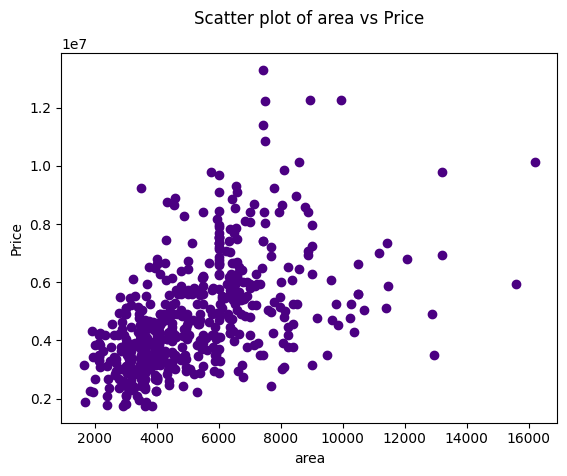

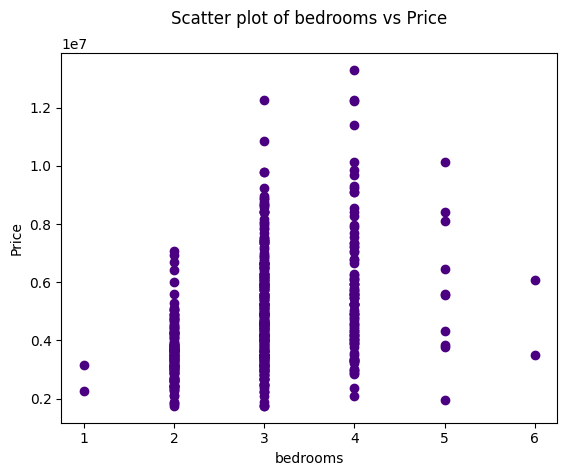

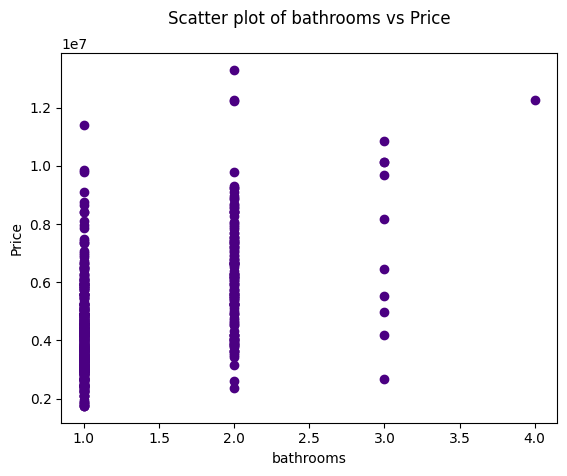

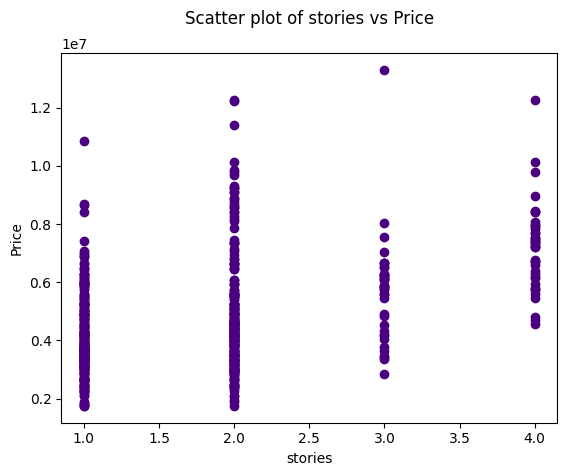

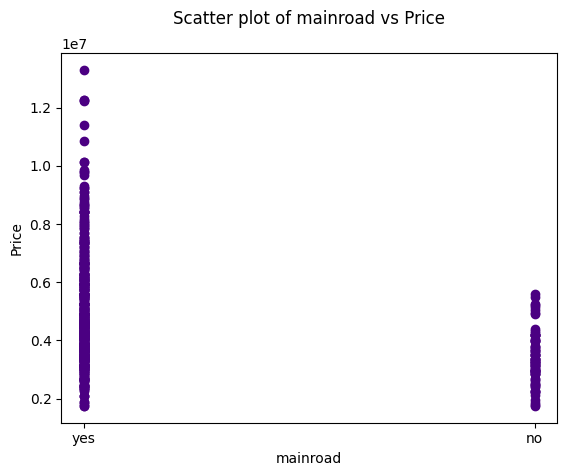

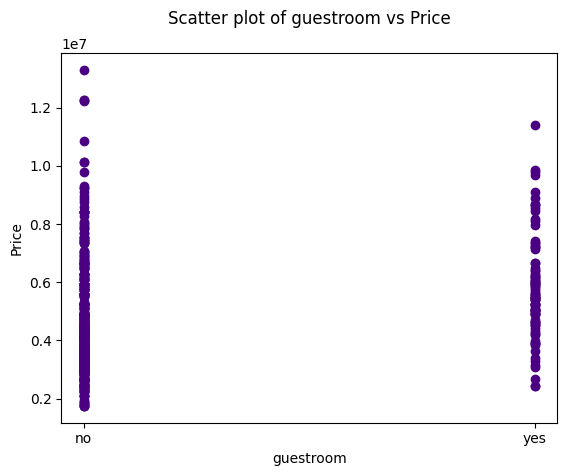

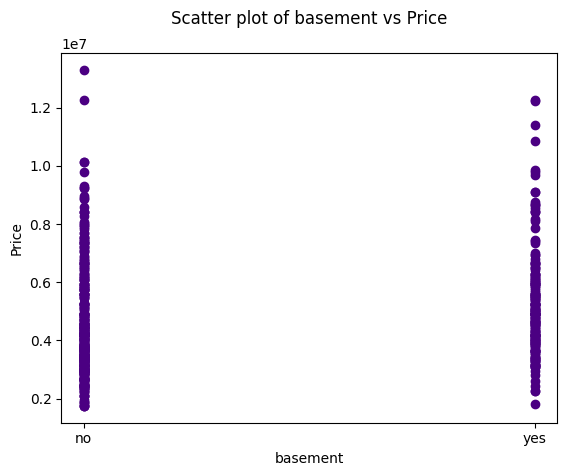

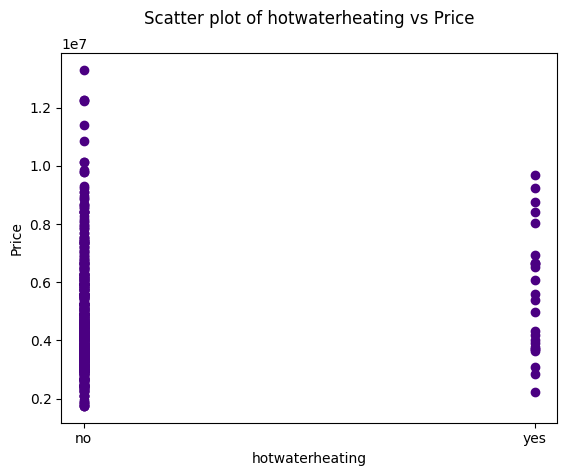

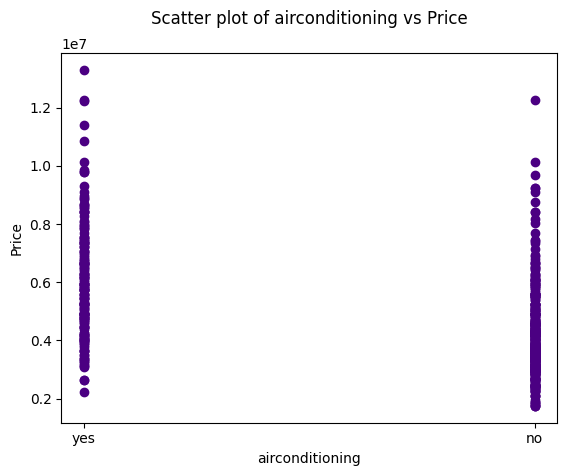

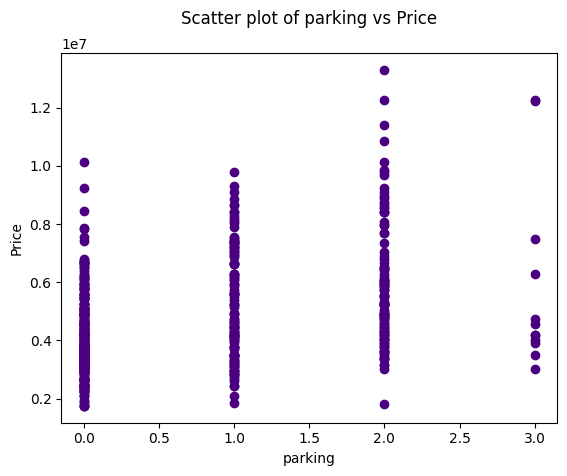

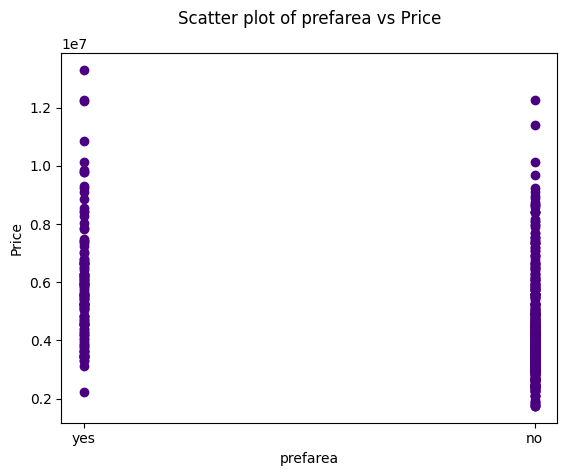

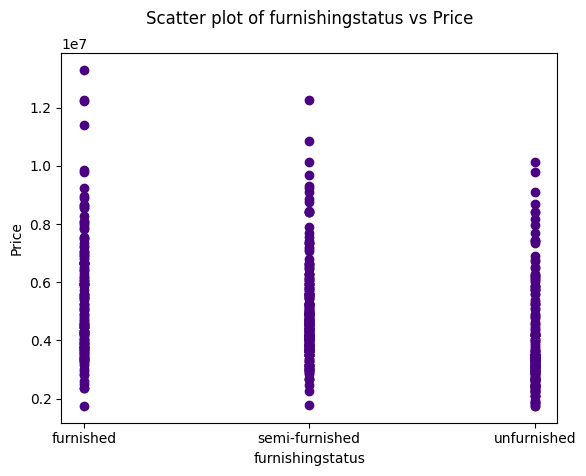

In [37]:
for column in X.columns:
    plt.scatter(X[column],y, color='indigo')
    plt.xlabel(column)
    plt.ylabel("Price")
    plt.title(f"Scatter plot of {column} vs Price\n")
    plt.show()

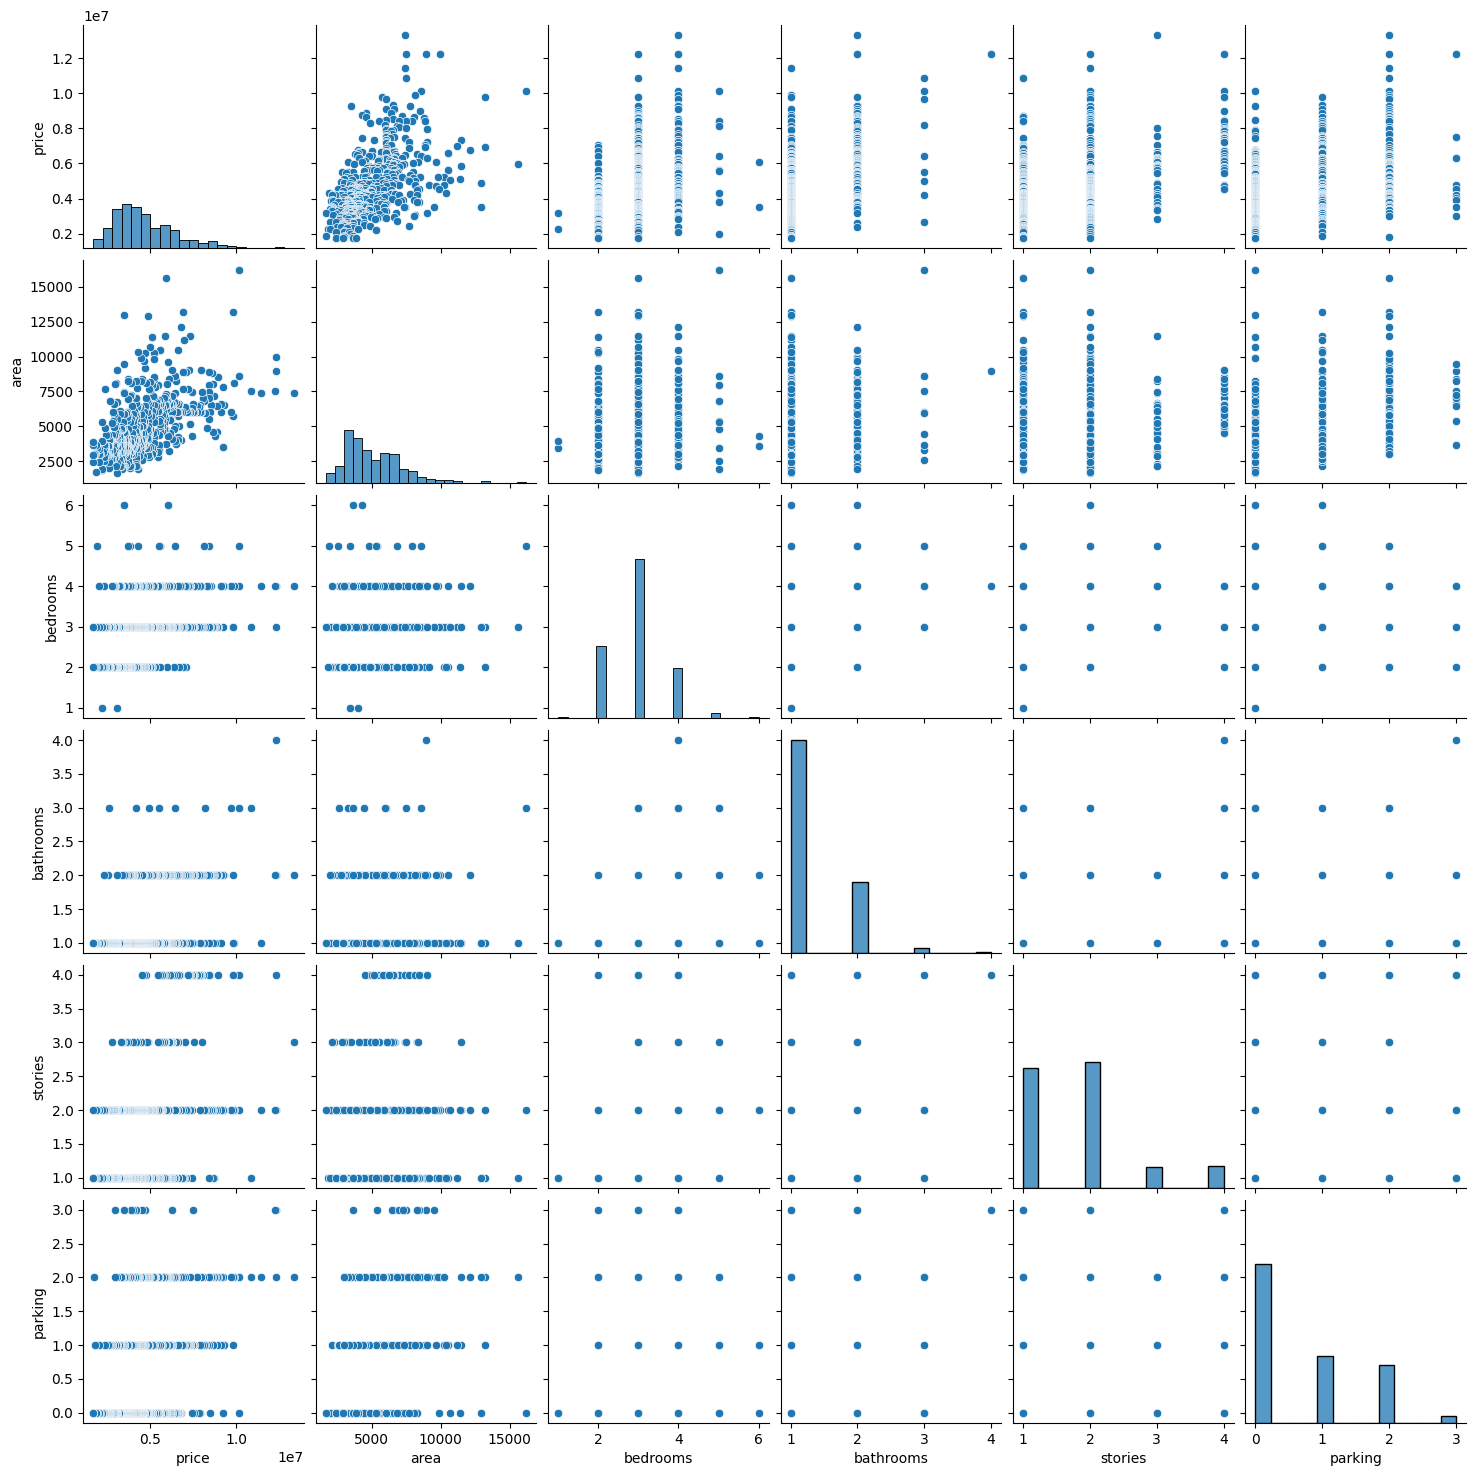

In [39]:
import seaborn as sns
sns.pairplot(df)

### 7 Encoding categorical data in X

In [40]:
label_encoder = LabelEncoder()
categorical_cols = X.select_dtypes(include=['object']).columns
for col in categorical_cols:
    X[col] = label_encoder.fit_transform(X[col])
print(X.head())

   area  bedrooms  bathrooms  stories  mainroad  guestroom  basement  \
0  7420         4          2        3         1          0         0   
1  8960         4          4        4         1          0         0   
2  9960         3          2        2         1          0         1   
3  7500         4          2        2         1          0         1   
4  7420         4          1        2         1          1         1   

   hotwaterheating  airconditioning  parking  prefarea  furnishingstatus  
0                0                1        2         1                 0  
1                0                1        3         0                 0  
2                0                0        2         1                 1  
3                0                1        3         1                 0  
4                0                1        2         0                 0  


### 8  Avoiding the Dummy Variable Trap

### 9. Apply feature scaling on numerical variables

In [41]:
scaler = StandardScaler()
X[X.select_dtypes(include=[np.number]).columns] = scaler.fit_transform(X[X.select_dtypes(include=[np.number]).columns])

### 10. Split data into training and testing sets

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### 11 Fitting Multiple Linear Regression to the Training

In [43]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### 12. Predict on the train set and calculate errors


In [44]:
y_train_pred = model.predict(X_train)
train_errors = y_train_pred - y_train
print(train_errors)

381   -4.520026e+04
278    6.791943e+05
105   -8.539390e+05
532   -6.566241e+04
331    2.821468e+06
           ...     
168   -9.795215e+04
515    1.026019e+06
24    -1.086763e+06
137   -1.655108e+06
44    -5.915253e+04
Name: price, Length: 381, dtype: float64


### 13. Residual plot for training data

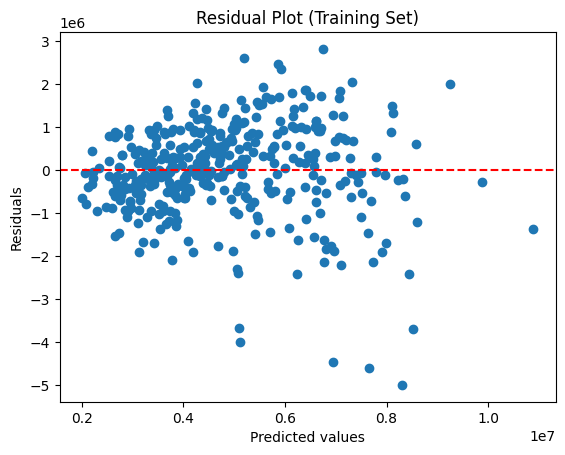

In [45]:
plt.scatter(y_train_pred, train_errors)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.title("Residual Plot (Training Set)")
plt.show()

### 14. Predict on the test set

In [46]:
y_test_pred = model.predict(X_test)
test_errors = y_test_pred - y_test

### 15. Residual plot for test data

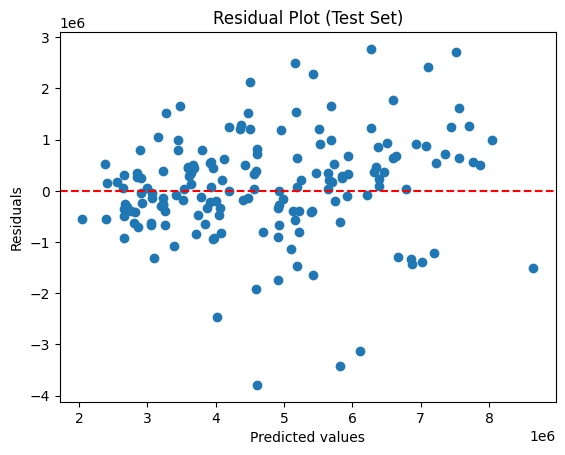

In [47]:
plt.scatter(y_test_pred, test_errors)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.title("Residual Plot (Test Set)")
plt.show()

### 16. Print Mean Squared Error and R Squared Value

In [48]:
mse = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)
print("Mean Squared Error:", mse)
print("R Squared Value:", r2)

Mean Squared Error: 1043103986875.9138
R Squared Value: 0.6241506804523624


### 17. Adjusted R Squared Value by selecting different number of input variables


In [49]:
def adjusted_r2(r2, n, k):
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))

adj_r2 = adjusted_r2(r2, X_test.shape[0], X_test.shape[1])
print("Adjusted R Squared Value:", adj_r2)

Adjusted R Squared Value: 0.5942818603558615


In [50]:
import pickle

# Replace `model` with your actual model variable name
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)


In [51]:
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
